# W24 CS 480/680 assignment 1 (coding part)


- Please save a copy of this notebook to avoid losing your changes.
- Debug your code and ensure that it can run before submission.
- Save the output of each cell. Failure to do so may result in your coding questions not being graded.
- Submit your completed version of this notebook.



## Implement Your Own Perceptron

In this question, you are asked to implement the **Perceptron** algorithm and test with a classification task on the adult dataset. Please refer to the [dataset webpage](https://archive.ics.uci.edu/dataset/53/iris) for details on the dataset, and consult the lecture slides and suggested readings for details on the Perceptron algorithm.

- `scikit-learn` or other off-the-shelf Perceptron libraries are not allowed to use.

- Please note that `class` column is the label of the dataset. The labellings have three possible values. So you need to implement a multi-class extension of Perceptron.

- Recording the accuracy on the training dataset when you train the Perceptron model on the training data, as an iteration. Repeat this step for 10 times.

- It is required that you split the dataset into training/testing datasets (80% and 20%, respectively), and we will deduct marks if you don't.

- You will get full marks for
    - Correctly split data into training set and testing set.
    - Correctly implement the perceptron algorithm.
    - Correctly handle multiple class.
    - A plot on training accuracy vs number of iterations, that relects the progress of the training.
    - Final reported accuracy (on the test dataset).

In [16]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# TODO: add any other package you need

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
filename = 'iris.csv'
urllib.request.urlretrieve(url, filename)

column_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]
data = pd.read_csv(filename, names=column_names)


In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Code for dataset splitting (training-testing):

In [18]:
# TODO: your implementation
X = data.drop('class', axis=1)
y = data['class']
n = X.shape[0]
indices = np.arange(n)
np.random.shuffle(indices)
X = X.iloc[indices]
y = y.iloc[indices]
    
train = int(n * 0.8)
X_train = X.iloc[:train]
y_train = y.iloc[:train]
X_test = X.iloc[train:]
y_test = y.iloc[train:]

print(n - train)

30


Code for implemeting the Perceptron algorithm:
- You can either implement it as an class/object or implement the training function and the prediction function.

In [19]:
# TODO: your implementation
class Perceptron:
    def __init__(self, learning_rate, iterations):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for _ in range(self.iterations):
            errors = 0
            for idx, x_i in enumerate(X):
                y_cur = np.dot(x_i, self.weights) + self.bias
                if y_cur * y[idx] <= 0:
                    update = self.lr * y[idx]
                    self.weights += update * x_i
                    self.bias += update
                    errors += 1
            self.errors.append(errors)
        return self


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return linear_output


Code for implementing a wrapper function:
- Handling multi-class extension
- Feeding in data and call Perceptron training function
- Outputing multiple Perceptrons that are trained

In [29]:
# TODO: your implementation
# One vs. All
def train_perceptrons(X, y):
    classes = np.unique(y)
    perceptrons = {}

    for cls in classes:
        y_binary = np.where(y == cls, 1, -1)
        perceptron = Perceptron(1, 10)
        perceptron.train(X, y_binary)
        perceptrons[cls] = perceptron

    return perceptrons

def predict_multi_perceptron(X, perceptrons):
    predictions = {cls: p.predict(X.values) for cls, p in perceptrons.items()}
    predictions_df = pd.DataFrame(predictions)
    ## print(predictions_df)
    
    predicted_classes = predictions_df.idxmax(axis=1)
    return predicted_classes

# Training Perceptrons
perceptrons = train_perceptrons(X_train.values, y_train.values)

predicted_classes = predict_multi_perceptron(X_test, perceptrons)



Code for testing and ploting:



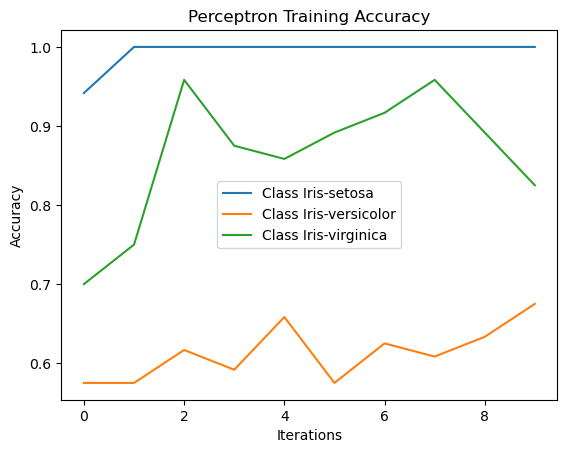

In [21]:
# TODO: plot the accuracy against the number of iterations
def plot_perceptron_training(perceptrons, X):
    n_samples = X.shape[0] 

    for cls, perceptron in perceptrons.items():
        accuracies = [(1 - (error / n_samples)) for error in perceptron.errors]
        plt.plot(accuracies, label=f'Class {cls}')

    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Perceptron Training Accuracy')
    plt.show()

plot_perceptron_training(perceptrons, X_train)

In [30]:
# TODO: report final accuracy
def test_perceptrons(X, y, perceptrons):
    predicted_classes = predict_multi_perceptron(X, perceptrons)
    ## print(predicted_classes.values == y.values)
    accuracy = np.mean(predicted_classes.values == y.values)
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

test_perceptrons(X_test, y_test, perceptrons)

Overall Accuracy: 76.67%
